=== SVM Classifier ===
Accuracy: 0.978
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


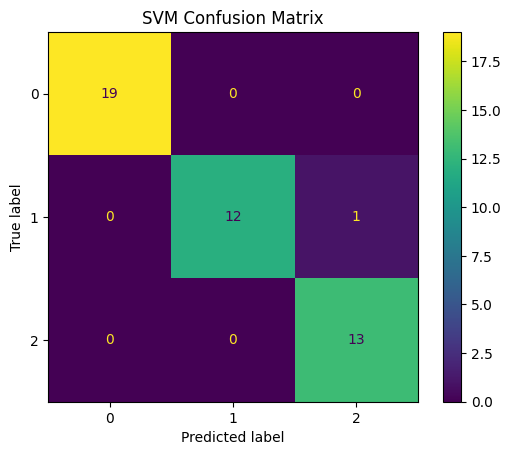

Precision: 0.976
Recall: 0.974
F1-score: 0.974

Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     0.923     0.960        13
           2      0.929     1.000     0.963        13

    accuracy                          0.978        45
   macro avg      0.976     0.974     0.974        45
weighted avg      0.979     0.978     0.978        45



In [3]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Classifier
clf_svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
clf_svm.fit(X_train_scaled, y_train)

# Predictions and probabilities
y_pred = clf_svm.predict(X_test_scaled)
y_scores = clf_svm.predict_proba(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print("=== SVM Classifier ===")
print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("SVM Confusion Matrix")
plt.show()
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))




# kernel ridge regression

In [2]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Kernel Ridge Regression
krr = KernelRidge(kernel='rbf', alpha=0.5, gamma=0.1)
krr.fit(X_train_scaled, y_train)
y_pred_krr = krr.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred_krr)
mae = mean_absolute_error(y_test, y_pred_krr)
rmse = np.sqrt(mse)

print("=== Kernel Ridge Regression ===")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


=== Kernel Ridge Regression ===
MSE: 0.027
MAE: 0.112
RMSE: 0.164
